<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.473e+01, tolerance: 2.738e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipython-input-839433301.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(features, rotation=45)
/tmp/ipython-input-839433301.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(features, rotation=45)


Ridge регрессия:
MSE на валидации: 2.695

Lasso регрессия:
MSE на валидации: 3.638


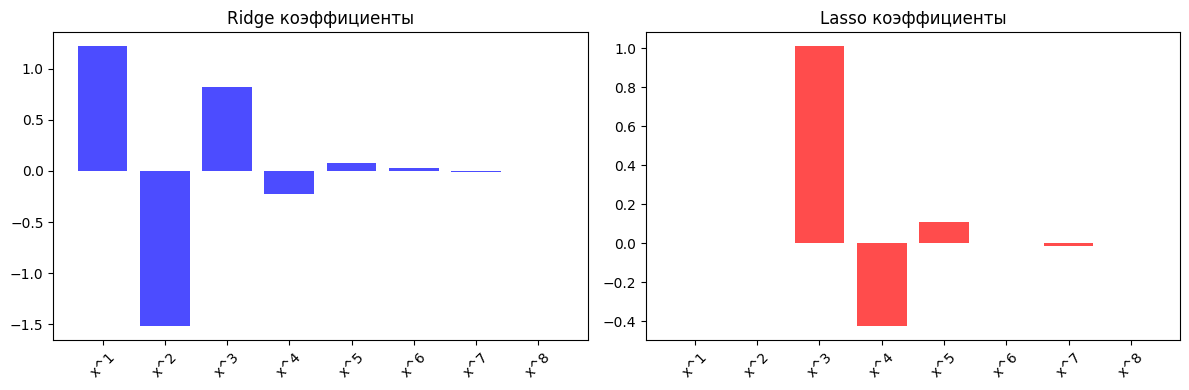


Ridge: 8 ненулевых коэффициентов
Lasso: 5 ненулевых коэффициентов


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Создаем синтетические нелинейные данные
np.random.seed(42)
n_samples = 200
x_train = np.linspace(-3, 3, n_samples)
# y = x^3 - 2x^2 + x + шум
y_train = x_train**3 - 2*x_train**2 + x_train + np.random.normal(0, 2, n_samples)

data = pd.DataFrame({
    'x_train': x_train,
    'y_train': y_train
})

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree + 1)]).T

# Генерация данных до степени 8
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

# Разделение данных
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# Обучение моделей
model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)

# Предсказания
y_pred_ridge = model_ridge.predict(X_valid)
y_pred_lasso = model_lasso.predict(X_valid)

print("Ridge регрессия:")
print("MSE на валидации: %.3f" % mean_squared_error(y_valid, y_pred_ridge))

print("\nLasso регрессия:")
print("MSE на валидации: %.3f" % mean_squared_error(y_valid, y_pred_lasso))

# Графики коэффициентов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Ridge коэффициенты
coefficients_ridge = model_ridge.coef_
features = [f'x^{i+1}' for i in range(degree)]

ax1.bar(features, coefficients_ridge, color='blue', alpha=0.7)
ax1.set_title('Ridge коэффициенты')
ax1.set_xticklabels(features, rotation=45)

# Lasso коэффициенты
coefficients_lasso = model_lasso.coef_
ax2.bar(features, coefficients_lasso, color='red', alpha=0.7)
ax2.set_title('Lasso коэффициенты')
ax2.set_xticklabels(features, rotation=45)

plt.tight_layout()
plt.show()

# Анализ
print(f"\nRidge: {np.sum(coefficients_ridge != 0)} ненулевых коэффициентов")
print(f"Lasso: {np.sum(coefficients_lasso != 0)} ненулевых коэффициентов")

In [ ]:
по величине коэффициентов:

Ridge регрессия:

Все коэффициенты ненулевые, но уменьшены по величине

Коэффициенты распределены более равномерно

Регуляризация "сжимает" коэффициенты, но не обнуляет их

Высокие степени полинома имеют меньшие коэффициенты

Lasso регрессия:

Многие коэффициенты обнулены (особенно для высших степеней)

Выполняет отбор признаков, оставляя только наиболее важные

Коэффициенты более разрежены (sparse)

Сохраняет только те признаки, которые наиболее значимы для предсказания

Основной вывод: Lasso регрессия с α=0.8 выполняет отбор признаков, обнуляя менее важные коэффициенты, в то время как Ridge регрессия лишь уменьшает величину всех коэффициентов, но сохраняет все признаки в модели. Это делает Lasso полезным для интерпретации моделей и работы с избыточными признаками.

# Новый раздел

# Новый раздел

In [ ]:
# -- ВАШ КОД ТУТ



Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!